In [2]:
import pandas as pd

# Load the dataset
cities_data = pd.read_csv('/content/worldcities.csv')  # Update the path

# Inspect the dataset
cities_data.head()


,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6850,139.7514,Japan,JP,JPN,Tōkyō,primary,35676000.0,1392685764
1,New York,New York,40.6943,-73.9249,United States,US,USA,New York,NaN,19354922.0,1840034016
2,Mexico City,Mexico City,19.4424,-99.1310,Mexico,MX,MEX,Ciudad de México,primary,19028000.0,1484247881
3,Mumbai,Mumbai,19.0170,72.8570,India,IN,IND,Mahārāshtra,admin,18978000.0,1356226629
4,São Paulo,Sao Paulo,-23.5587,-46.6250,Brazil,BR,BRA,São Paulo,admin,18845000.0,1076532519


In [4]:
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Handling missing values
imputer = SimpleImputer(strategy='mean')
cities_data_imputed = pd.DataFrame(imputer.fit_transform(cities_data.select_dtypes(include=[np.number])))

# Normalizing the data
scaler = StandardScaler()
cities_data_normalized = scaler.fit_transform(cities_data_imputed)


In [5]:
!pip install scikit-learn
from sklearn.manifold import Isomap

# Apply ISOMap
isomap = Isomap(n_neighbors=5, n_components=2)  # Adjust parameters as needed
cities_data_isomap = isomap.fit_transform(cities_data_normalized)

# Convert to DataFrame for visualization
cities_data_isomap_df = pd.DataFrame(cities_data_isomap, columns=['ISOMap1', 'ISOMap2'])


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 54 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.10/dist-package

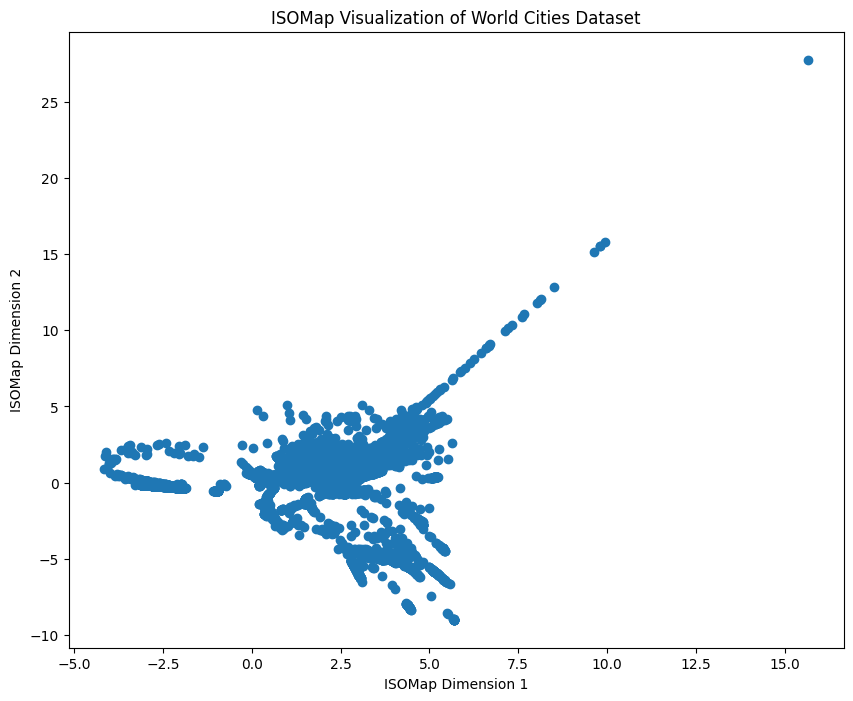

In [6]:
import matplotlib.pyplot as plt

# Scatter Plot
plt.figure(figsize=(10, 8))
plt.scatter(cities_data_isomap_df['ISOMap1'], cities_data_isomap_df['ISOMap2'])
plt.title('ISOMap Visualization of World Cities Dataset')
plt.xlabel('ISOMap Dimension 1')
plt.ylabel('ISOMap Dimension 2')
plt.show()


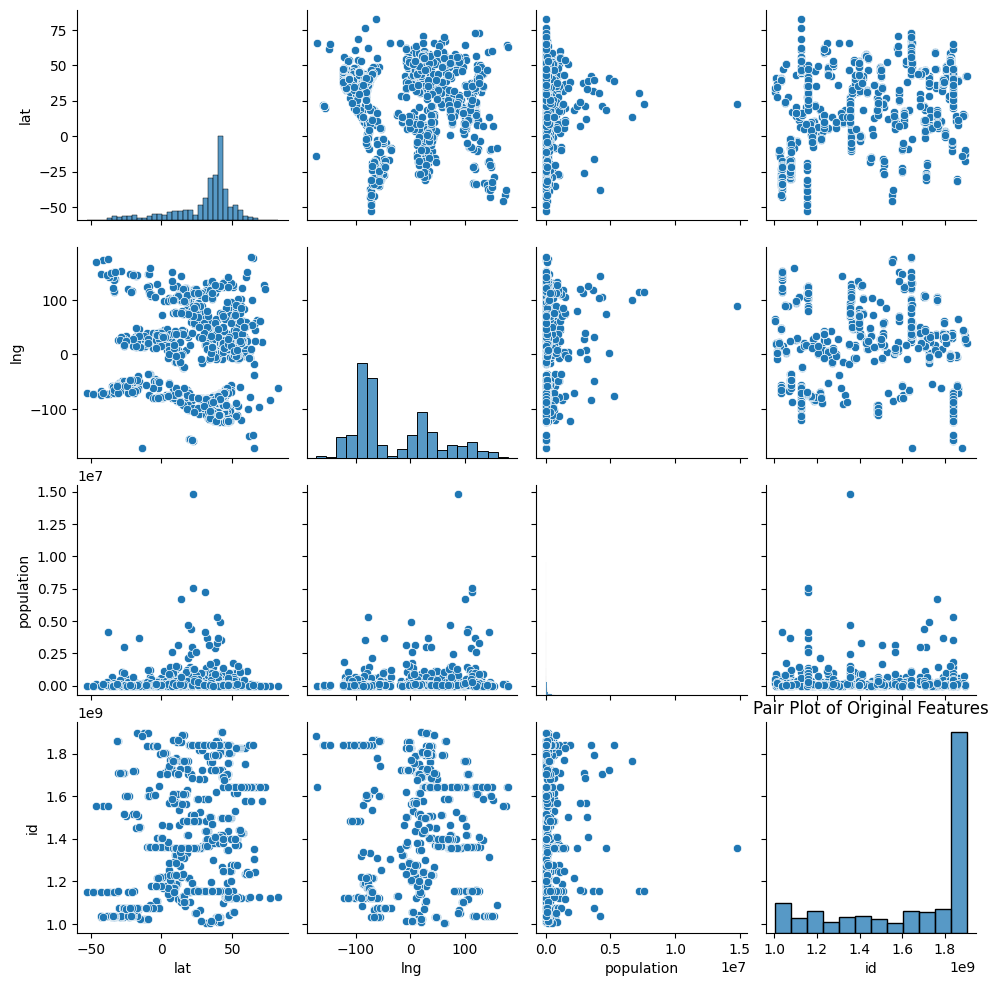

In [9]:
import seaborn as sns

# Pair Plot
sns.pairplot(cities_data.sample(frac=0.1))  # Adjust the fraction as needed
plt.title('Pair Plot of Original Features')
plt.show()


<ipython-input-8-34470b43b8d7>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(cities_data.corr(), annot=True, fmt=".2f")


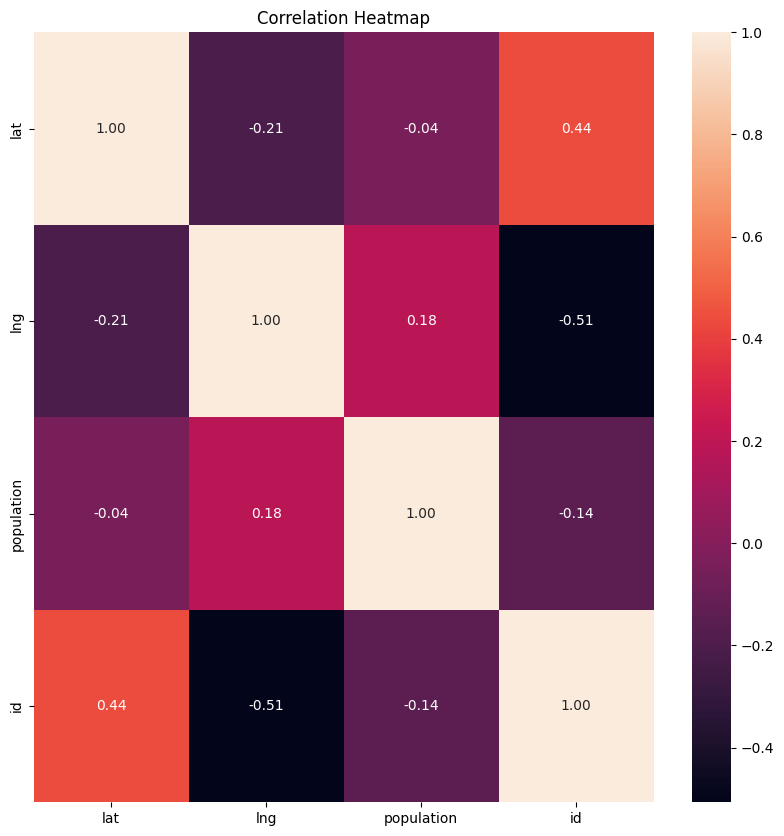

In [8]:
# Correlation Heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(cities_data.corr(), annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

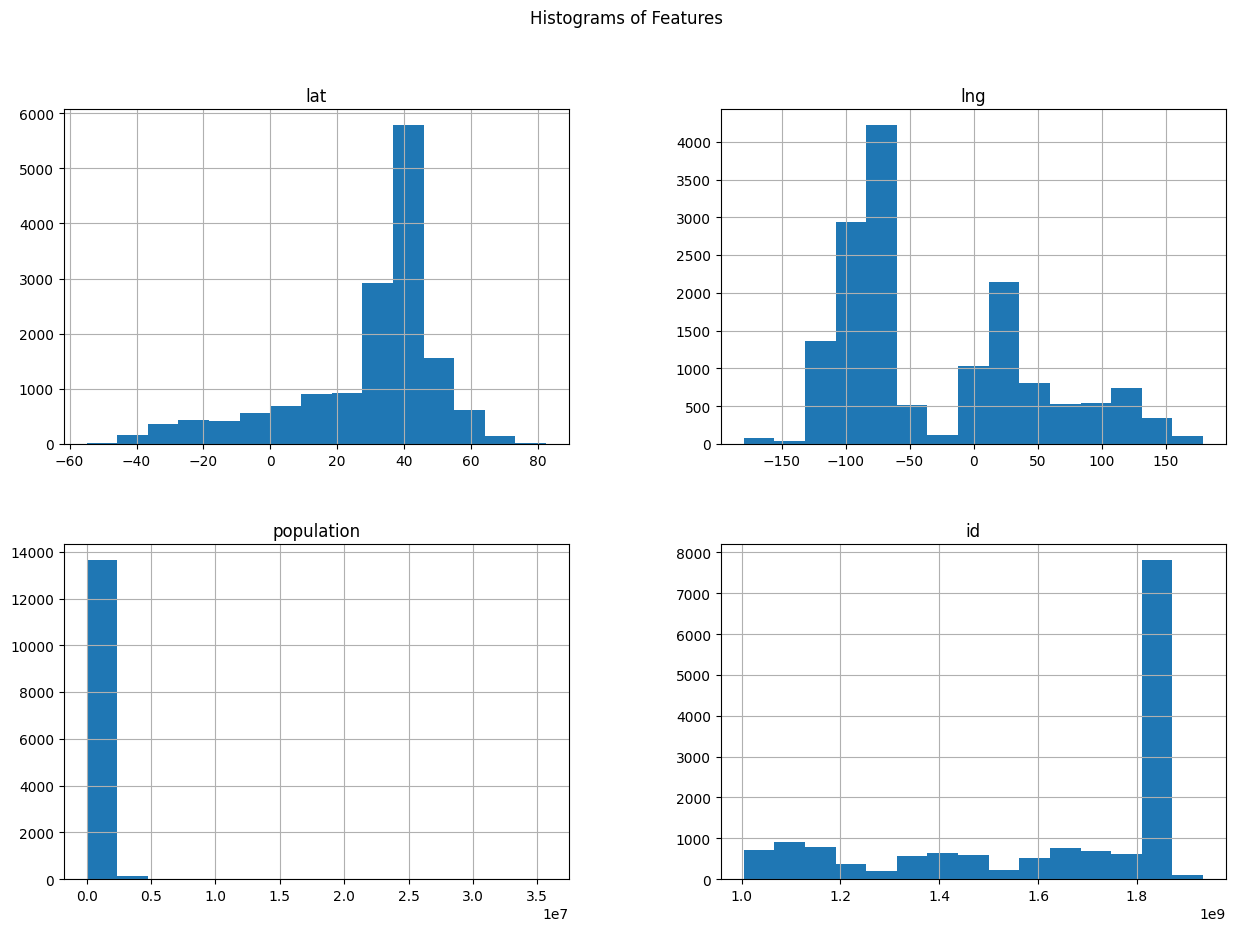

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histograms for each numerical feature
cities_data.hist(bins=15, figsize=(15, 10))
plt.suptitle('Histograms of Features')
plt.show()




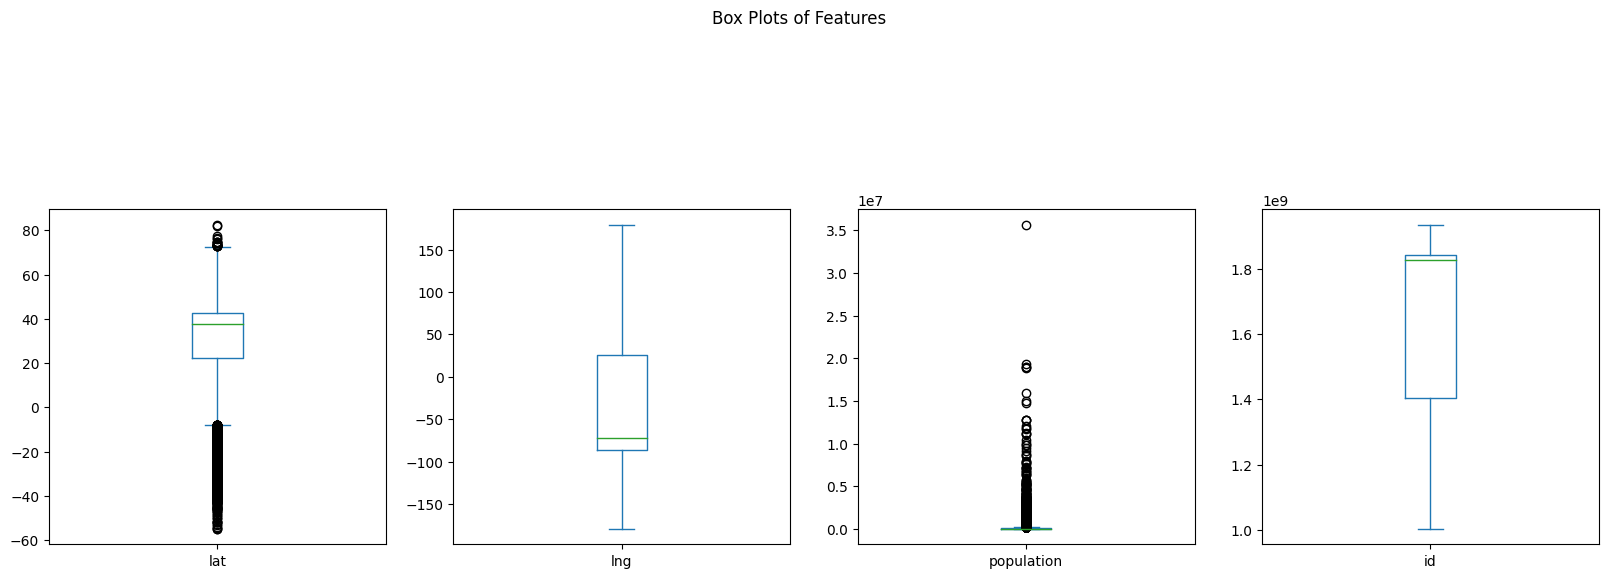

In [12]:
# Box Plots for each feature
cities_data.plot(kind='box', subplots=True, layout=(4,4), figsize=(20, 20))
plt.suptitle("Box Plots of Features")
plt.show()


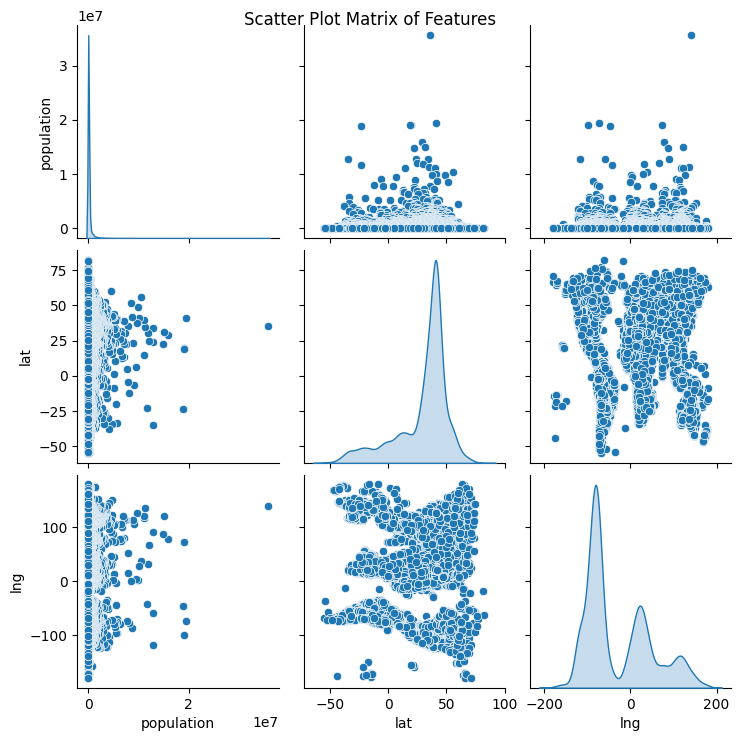

In [13]:

# Scatter Plot Matrix for specific features (replace 'feature1', 'feature2', etc.)
sns.pairplot(cities_data[['population', 'lat', 'lng']], diag_kind='kde')
plt.suptitle('Scatter Plot Matrix of Features')
plt.show()

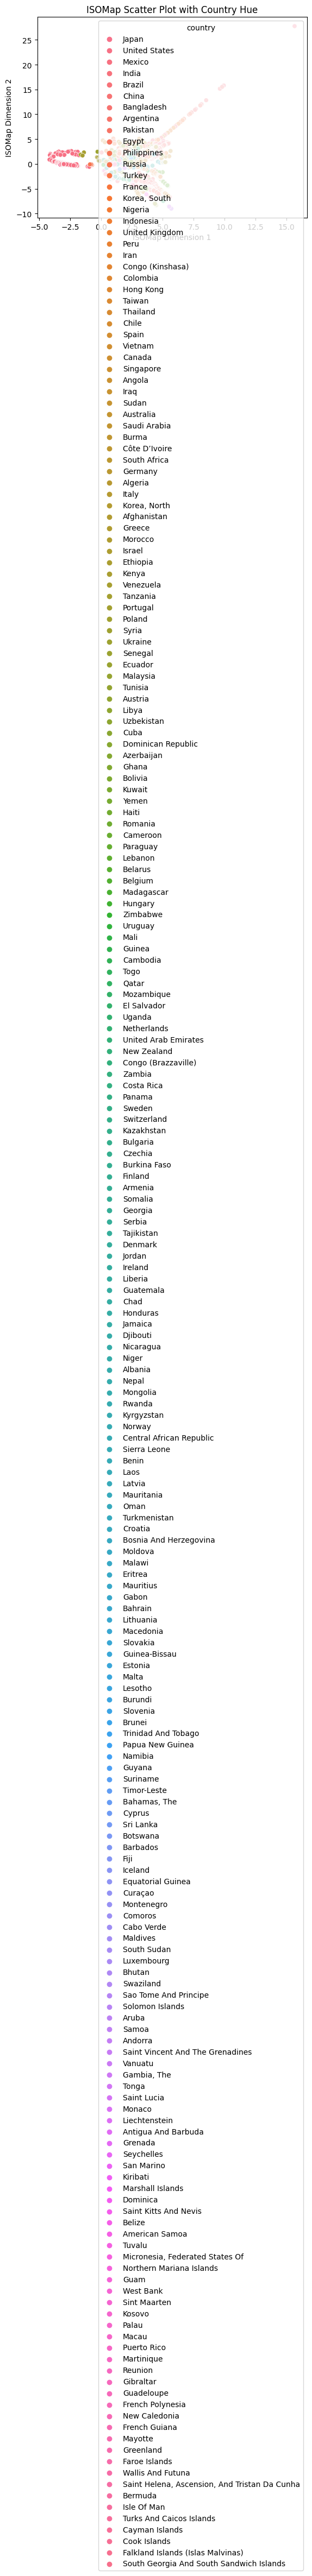

In [14]:
# Assuming you have a categorical column like 'country' for color-coding
sns.scatterplot(x='ISOMap1', y='ISOMap2', hue=cities_data['country'], data=cities_data_isomap_df)
plt.title('ISOMap Scatter Plot with Country Hue')
plt.xlabel('ISOMap Dimension 1')
plt.ylabel('ISOMap Dimension 2')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


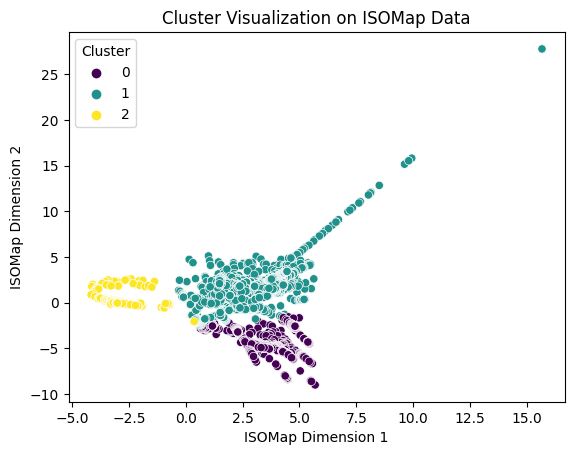

In [15]:

# Cluster Visualization After ISOMap (assuming you have applied a clustering algorithm)
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(cities_data_isomap)
cities_data_isomap_df['Cluster'] = clusters

sns.scatterplot(x='ISOMap1', y='ISOMap2', hue='Cluster', data=cities_data_isomap_df, palette='viridis')
plt.title('Cluster Visualization on ISOMap Data')
plt.xlabel('ISOMap Dimension 1')
plt.ylabel('ISOMap Dimension 2')
plt.legend(title='Cluster')
plt.show()
